Text(0.5,1,'predator prey model in presence of predation')

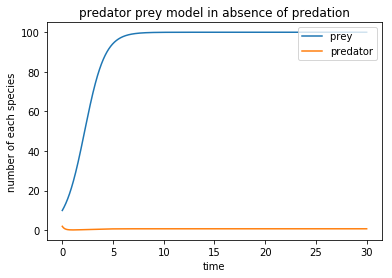

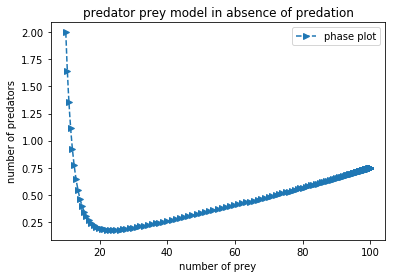

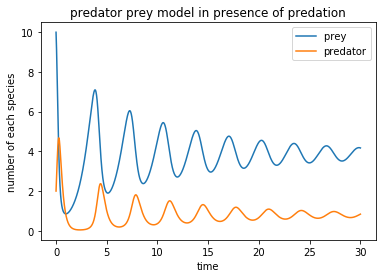

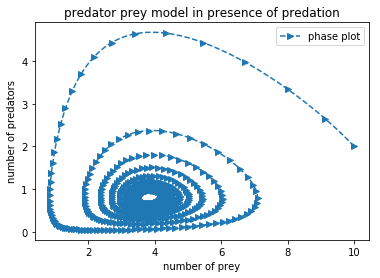

In [7]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline


# set the initial parameters

# growth rate of prey = 1.0
a = 1.0

# death rate of prey due to presence of predator but in the absence of predation = 0.01
b = -0.01

# death rate of prey due to self competions of prey = 0.01
e = -0.01

# growth rate of predator due to presence of prey but in the absence of predation = 0.03
c = 0.03

# natural death rate of predators = 4.0
d = -4.0

# death rate of predators due to self competions of predators = 0.01
f = -0.01

# death rate of prey due to encounter with predator = 1.2
g = -1.2

# rate of efficiency of predators turning predated preys into predators(rate of producing offsprings)
h = 1.0


# function for temporal development of the species
def species_step(u, function, dt, predation):
    """
    Parameters
    ----------
    u : array of float solution at the previous time-step.
    f : function to compute development of the species
    dt : float time-increment.
    
    Returns
    -------
    u[n]+1 : array of float approximate solution at the next time step.
    """
   
    return u + dt * function(u, predation)

# define the function that represents the Lotka-Volterra equations
def function(u, predation):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float array containing the solution at time n.
        
    Returns
    -------
    du/dt : array of float array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    
    # when there is no interaction between two species i.e between x and y
    if not predation:
        return numpy.array([(a*x)+(b*y)+(e*x*x), (c*x)+(d*y)+(f*y*y)])
    
    # when there is interaction between two species i.e between x and y
    if predation:
        return numpy.array([(a*x)+(b*y)+(e*x*x)+(g*x*y), (c*x)+(d*y)+(f*y*y)+(h*x*y)])
    
    


# set time-increment and discretize the time
T  = 30.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps


x0 = 10.0    # number of preys at time,t=0
y0 = 2.0     # number of predators at time,t=0
t0 = 0.0

# set initial conditions
u_species = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_species[0] = numpy.array([x0, y0])

predation = False      
# case-1: temporal development of species in the absence of predation
for n in range(N-1):
    u_species[n+1] = species_step(u_species[n], function, dt, predation)
    

time = numpy.linspace(0.0, T,N)
u_prey = u_species[:,0]
u_predator = u_species[:,1]

# to plot predator-prey model in the absence of predation
fig_a = plt.figure()
fig1 = fig_a.add_subplot(111)
fig1.plot(time, u_prey, label = 'prey ')
fig1.plot(time, u_predator, label = 'predator')
fig1.legend(loc='upper right')
plt.xlabel("time")
plt.ylabel("number of each species")
plt.title("predator prey model in absence of predation")

# phase plot in the absence of predation
fig_b = plt.figure()
fig2 = fig_b.add_subplot(111)
plt.plot(u_prey, u_predator, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
plt.xlabel("number of prey")
plt.ylabel("number of predators")
plt.title("predator prey model in absence of predation")

# temporal development of species in the presence of predation
predation = True
u_species = numpy.empty((N, 2))
u_species[0] = numpy.array([x0, y0])
for n in range(N-1):
    u_species[n+1] = species_step(u_species[n], function, dt, predation)
    

time = numpy.linspace(0.0, T,N)
u_prey = u_species[:,0]
u_predator = u_species[:,1]

# to plot predator-prey model in the presence of predation
fig_c = plt.figure()
fig3 = fig_c.add_subplot(111)
fig3.plot(time, u_prey, label = 'prey ')
fig3.plot(time, u_predator, label = 'predator')
fig3.legend(loc='upper right')
plt.xlabel("time")
plt.ylabel("number of each species")
plt.title("predator prey model in presence of predation")

# phase plot in the presence of predation
fig_d = plt.figure()
fig4 = fig_d.add_subplot(111)
plt.plot(u_prey, u_predator, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
plt.xlabel("number of prey")
plt.ylabel("number of predators")
plt.title("predator prey model in presence of predation")
